In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

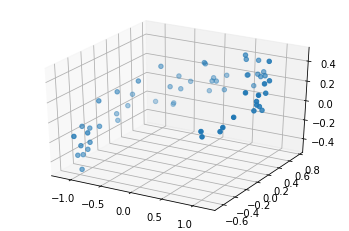

In [8]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], cmap='Greens');

### Applying raw PCA using svd decomposition

In [29]:
X_centered = X - X.mean(axis=0)

#Vt.T contains the unit vectors as columns i.e. it contains the principle components
#No. of PCs = dimesion of data = 3
#PCs are mutually perpendicular
U, s, Vt = np.linalg.svd(X_centered)

#The unit vectors defining the d-dimensional hyperplane
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [21]:
V_reduced = Vt.T[:, :2]
X_reduced = X_centered.dot(V_reduced)

### Applying PCA from scikit

#### Using PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_reduced_scikit = pca.fit_transform(X)#No need to centre the data

#### Explained Variance Ratio

In [38]:
#This output tells you that 84.2% of the dataset’s variance lies along the first PC, and 14.6% lies along the second PC.
print(pca.explained_variance_ratio_)

[0.84248607 0.14631839 0.01119554]


#### Choosing the correct degree d as per variance reduction

In [43]:
pca_choose_d = PCA()#By default n_parameters = n
pca_choose_d.fit(X)
cumulative_sum = np.cumsum(pca_choose_d.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 #95% variance retained

# ALTERNATIVELY

#pca_choose_d = PCA(n_components=0.95)
#X_reduced = pca.fit_transform(X)

### Randomized PCA

### Incremental PCA